<br>
<p style="color:blue;">Introduction to Uber's Challenge: Explore how Uber's massive daily operations necessitate accurate fare prediction for optimal business strategies.</p>

<p style="color:green;">Dataset Dive: Delve into the dataset's key attributes:</p>

<p style="color:red;">
    <ul>
        <li><strong>key:</strong> Unique trip identifier.</li>
        <li><strong>fare_amount:</strong> Cost of trip (in USD).</li>
        <li><strong>pickup_datetime:</strong> Timestamp of trip start.</li>
        <li><strong>passenger_count:</strong> Number of passengers.</li>
        <li><strong>pickup_longitude & pickup_latitude:</strong> Initial pickup coordinates.</li>
        <li><strong>dropoff_longitude & dropoff_latitude:</strong> Drop-off coordinates.</li>
    </ul>
</p>


<br>
import all lib

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats # here it used for the Q-Q plot 

In [2]:
from  sklearn.linear_model import LinearRegression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [5]:
UberPrice_datasets = pd.read_csv('uber.csv')
UberPrice_datasets.sample(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
54150,23684374,41:17.0,7.7,2009-04-05 07:41:17 UTC,-74.004337,40.721783,-73.994730,40.750432,1
8938,3159317,11:36.0,16.5,2012-04-11 02:11:36 UTC,-73.984370,40.760776,-73.951370,40.706955,1
51844,37366081,28:00.0,4.5,2013-09-30 07:28:00 UTC,-74.001055,40.747210,-74.008162,40.748722,1
160562,7748459,24:00.0,13.7,2010-03-27 19:24:00 UTC,-73.948757,40.782395,-73.991543,40.759948,1
60450,29284366,35:00.0,13.0,2014-10-13 08:35:00 UTC,-73.993137,40.742495,-73.976477,40.765337,1


In [6]:
print(UberPrice_datasets.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [7]:
UberPrice_datasets.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
UberPrice_datasets.shape

(200000, 9)

In [9]:
UberPrice_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [10]:
UberPrice_datasets.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
UberPrice_datasets.isnull().mean() * 100

Unnamed: 0           0.0000
key                  0.0000
fare_amount          0.0000
pickup_datetime      0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64

In [12]:
UberPrice_datasets = UberPrice_datasets.dropna()

In [13]:
UberPrice_datasets.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
UberPrice_datasets.duplicated().sum()

0

In [15]:
UberPrice_datasets.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [16]:
UberPrice_datasets.describe().corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,-0.470365,-0.468282,-0.466757,-0.459392,-0.466938,-0.471405
fare_amount,-0.470365,1.000000,0.999982,0.999984,0.999856,0.999988,0.999999
pickup_longitude,-0.468282,0.999982,1.000000,0.999963,0.999927,0.999993,0.999980
pickup_latitude,-0.466757,0.999984,0.999963,1.000000,0.999879,0.999987,0.999975
dropoff_longitude,-0.459392,0.999856,0.999927,0.999879,1.000000,0.999925,0.999841
dropoff_latitude,-0.466938,0.999988,0.999993,0.999987,0.999925,1.000000,0.999982
passenger_count,-0.471405,0.999999,0.999980,0.999975,0.999841,0.999982,1.000000


In [17]:
UberPrice_datasets.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [18]:
UberPrice_datasets = UberPrice_datasets.drop(columns = ['Unnamed: 0'],axis = 1)
UberPrice_datasets.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [19]:
UberPrice_datasets = UberPrice_datasets.drop(columns = ['key'],axis = 1)
UberPrice_datasets.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [20]:
UberPrice_datasets['pickup_datetime'].value_counts()

pickup_datetime
2014-04-13 18:19:00 UTC    4
2009-02-12 12:46:00 UTC    4
2010-03-14 12:00:00 UTC    4
2011-05-25 22:15:00 UTC    3
2011-04-24 01:11:00 UTC    3
                          ..
2013-03-08 07:16:00 UTC    1
2013-05-17 21:33:31 UTC    1
2009-10-24 04:05:00 UTC    1
2013-05-16 16:12:00 UTC    1
2010-05-15 04:08:00 UTC    1
Name: count, Length: 196628, dtype: int64

In [21]:
# here this finding the columns who has the (object ) mmixed_columns
mixed_columns = UberPrice_datasets.select_dtypes(include=['object']).columns
print(mixed_columns)

Index(['pickup_datetime'], dtype='object')


In [22]:
UberPrice_datasets['pickup_datetime'].unique()

array(['2015-05-07 19:52:06 UTC', '2009-07-17 20:04:56 UTC',
       '2009-08-24 21:45:00 UTC', ..., '2009-06-29 00:42:00 UTC',
       '2015-05-20 14:56:25 UTC', '2010-05-15 04:08:00 UTC'], dtype=object)

In [23]:
UberPrice_datasets.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [24]:
UberPrice_datasets['mixed_column'] = pd.to_numeric(UberPrice_datasets['pickup_datetime'], errors='coerce')

In [25]:
UberPrice_datasets['mixed_column'] = UberPrice_datasets['pickup_datetime'].astype(str).str.replace(r'\d+', '')

In [26]:
UberPrice_datasets['mixed_column']

0         2015-05-07 19:52:06 UTC
1         2009-07-17 20:04:56 UTC
2         2009-08-24 21:45:00 UTC
3         2009-06-26 08:22:21 UTC
4         2014-08-28 17:47:00 UTC
                   ...           
199995    2012-10-28 10:49:00 UTC
199996    2014-03-14 01:09:00 UTC
199997    2009-06-29 00:42:00 UTC
199998    2015-05-20 14:56:25 UTC
199999    2010-05-15 04:08:00 UTC
Name: mixed_column, Length: 199999, dtype: object

In [27]:
UberPrice_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
 7   mixed_column       199999 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 13.7+ MB


In [28]:
UberPrice_datasets.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,mixed_column
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06 UTC
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56 UTC


In [29]:
UberPrice_datasets = UberPrice_datasets.drop(columns = ['pickup_datetime'],axis = 1)
UberPrice_datasets.head(4)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,mixed_column
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06 UTC
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56 UTC
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00 UTC
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21 UTC


In [30]:
# here it converting into the datatimes 
UberPrice_datasets['mixed_column'] = pd.to_datetime(UberPrice_datasets['mixed_column'])

In [31]:
UberPrice_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_longitude   199999 non-null  float64            
 2   pickup_latitude    199999 non-null  float64            
 3   dropoff_longitude  199999 non-null  float64            
 4   dropoff_latitude   199999 non-null  float64            
 5   passenger_count    199999 non-null  int64              
 6   mixed_column       199999 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [32]:
# now handling the data and time as shown 
UberPrice_datasets['data_Years'] = UberPrice_datasets['mixed_column'].dt.year
UberPrice_datasets['date_month'] = UberPrice_datasets['mixed_column'].dt.month
UberPrice_datasets['date_day'] = UberPrice_datasets['mixed_column'].dt.day
UberPrice_datasets['date_dow'] = UberPrice_datasets['mixed_column'].dt.dayofweek
 
UberPrice_datasets.head(4)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,mixed_column,data_Years,date_month,date_day,date_dow
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06+00:00,2015,5,7,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56+00:00,2009,7,17,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00+00:00,2009,8,24,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21+00:00,2009,6,26,4


In [33]:
# here we extating the time in this 
UberPrice_datasets['hour'] = UberPrice_datasets['mixed_column'].dt.hour
UberPrice_datasets['min'] = UberPrice_datasets['mixed_column'].dt.minute
UberPrice_datasets['sec'] = UberPrice_datasets['mixed_column'].dt.second 

In [34]:
UberPrice_datasets.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,mixed_column,data_Years,date_month,date_day,date_dow,hour,min,sec
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 19:52:06+00:00,2015,5,7,3,19,52,6
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 20:04:56+00:00,2009,7,17,4,20,4,56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 21:45:00+00:00,2009,8,24,0,21,45,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 08:22:21+00:00,2009,6,26,4,8,22,21
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 17:47:00+00:00,2014,8,28,3,17,47,0


In [35]:
UberPrice_datasets  = UberPrice_datasets.drop(columns = ['mixed_column'],axis = 1)
UberPrice_datasets.head(4)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,data_Years,date_month,date_day,date_dow,hour,min,sec
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52,6
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4,56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,45,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,22,21


In [36]:
# plt.figure()# Create a new figure for each plot
# sns.histplot(UberPrice_datasets['pickup_longitude'],color = "g",kde=True)  

<Figure size 640x480 with 0 Axes>

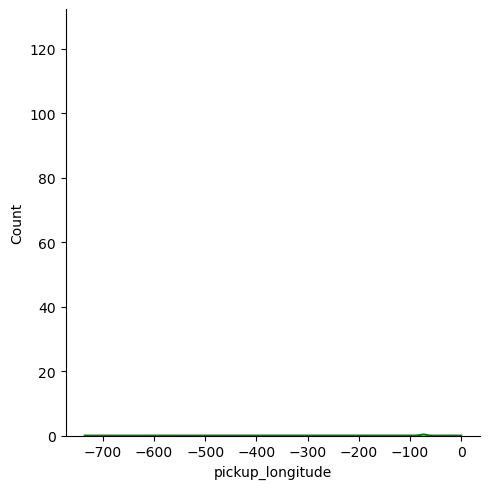

In [37]:
# Taking a sample of 10,000 points from the dataset if it is large
sampled_data = UberPrice_datasets['pickup_longitude'].sample(n=1000, random_state=1)

plt.figure()
sns.displot(sampled_data, color="g", kde=True)
plt.show()

In [38]:
data = UberPrice_datasets['pickup_longitude']
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Count outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")
print(f"Outliers: {outliers}")


Number of outliers: 13559
Outliers: 4         -73.925023
7           0.000000
11          0.000000
34        -73.788080
65          0.000000
             ...    
199936   -736.400000
199937    -73.873040
199960    -73.920354
199963      0.000000
199972    -73.786833
Name: pickup_longitude, Length: 13559, dtype: float64


In [39]:
# Filter out the outliers
cleaned_data = data[(data >= lower_bound) & (data <= upper_bound)]

# Optionally, convert cleaned data back to the original DataFrame format
UberPrice_datasets_cleaned = UberPrice_datasets[UberPrice_datasets['pickup_longitude'].between(lower_bound, upper_bound)]

print(f"Number of data points after removing outliers: {len(cleaned_data)}")


Number of data points after removing outliers: 186440


Number of data points after removing outliers: 170471


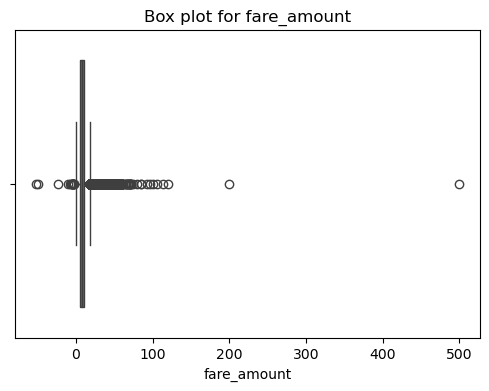

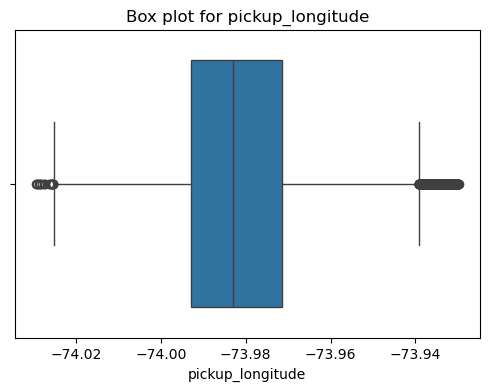

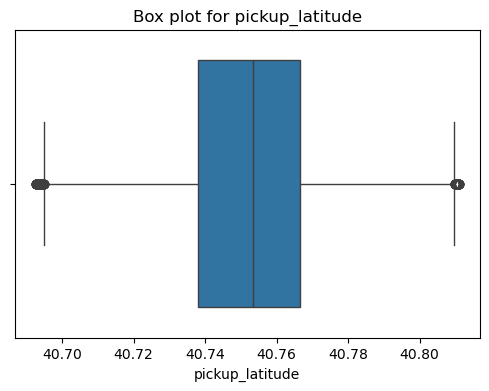

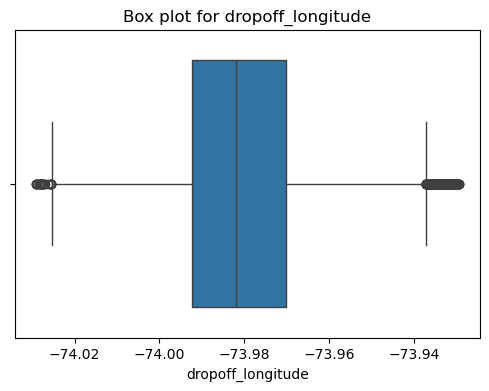

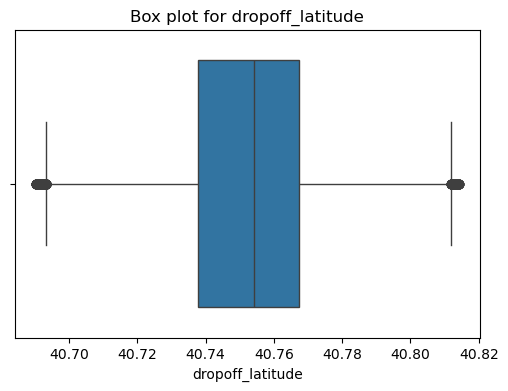

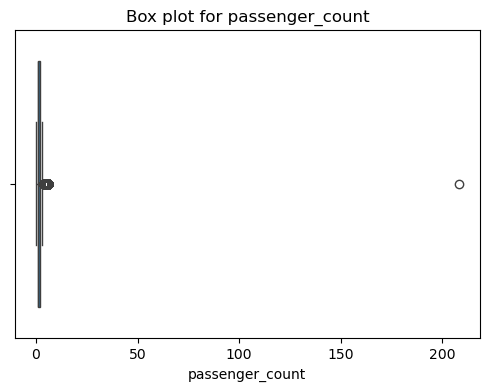

In [40]:


# Function to remove outliers based on IQR for a given column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to the desired columns
columns_to_clean = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
cleaned_dataset = UberPrice_datasets.copy()

for column in columns_to_clean:
    cleaned_dataset = remove_outliers(cleaned_dataset, column)

print(f"Number of data points after removing outliers: {len(cleaned_dataset)}")

# Function to create a box plot for a given column
def plot_boxplot(df, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()

# Plot box plots for the cleaned data
columns_to_plot = ['fare_amount','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count']
for column in columns_to_plot:
    plot_boxplot(cleaned_dataset, column)


In [41]:
cleaned_dataset.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,data_Years,date_month,date_day,date_dow,hour,min,sec
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52,6
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4,56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,0,21,45,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,4,8,22,21
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,12,5,2,27,9


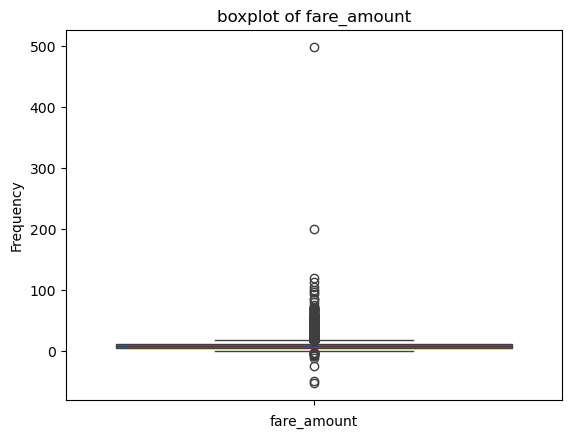

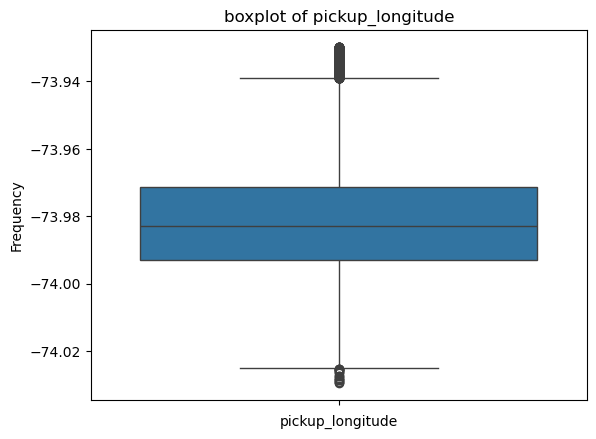

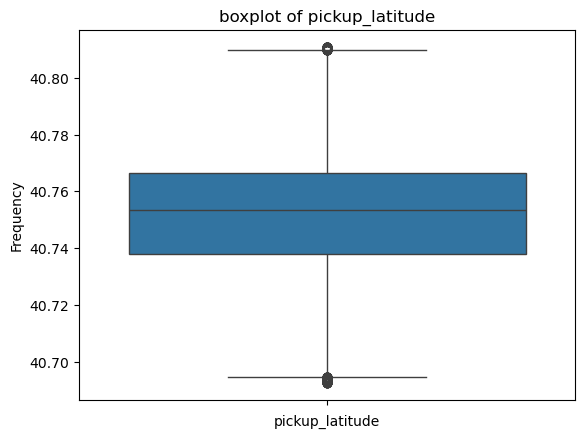

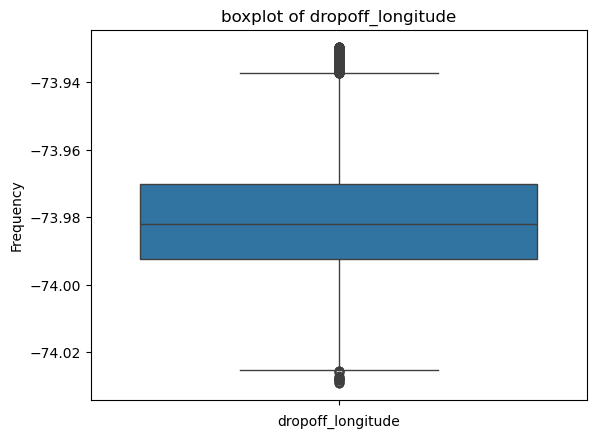

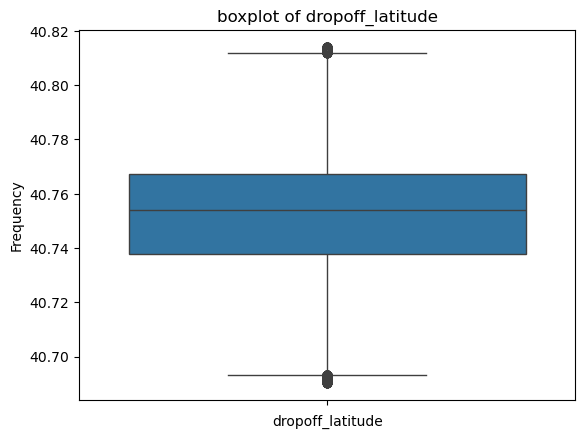

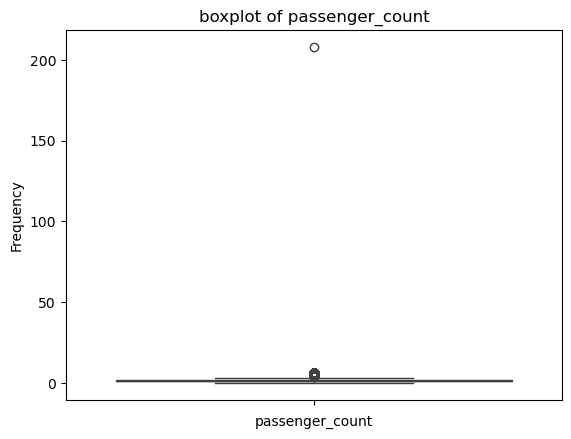

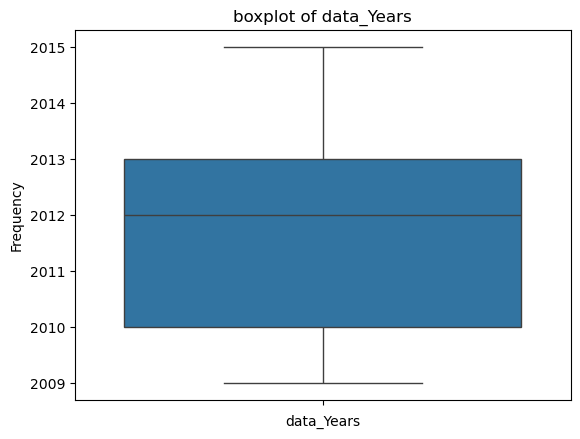

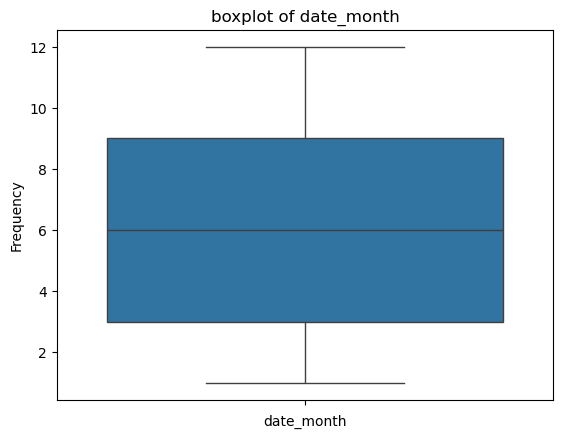

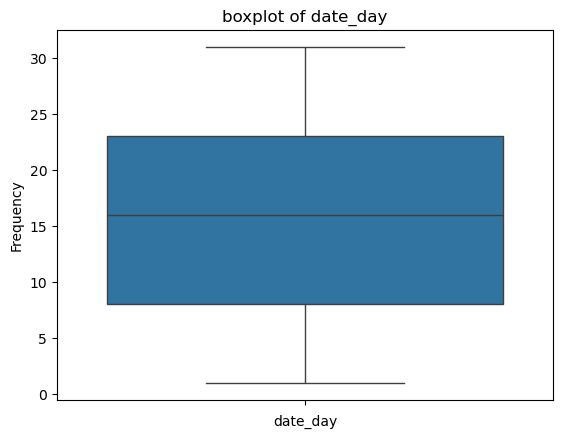

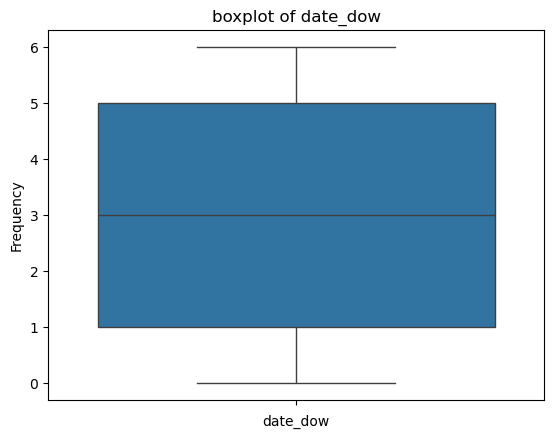

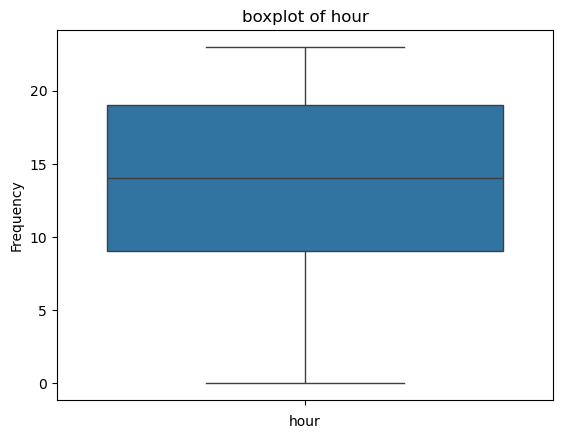

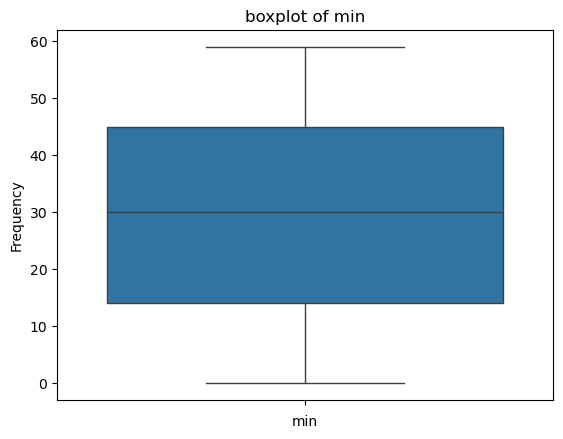

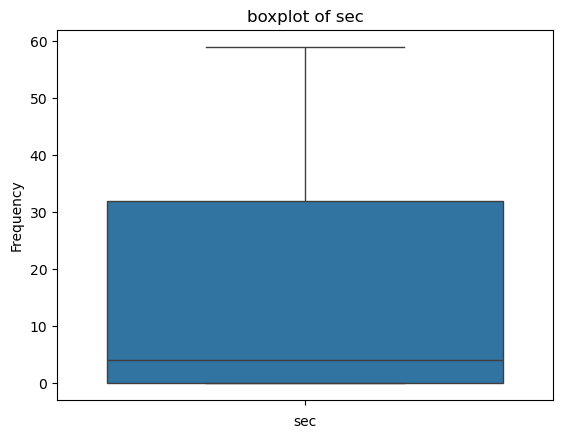

In [42]:
for column in cleaned_dataset.columns:
    plt.figure()
    sns.boxplot(cleaned_dataset[column])
    plt.xlabel(column)  
    plt.ylabel('Frequency')  
    plt.title(f'boxplot of {column}')  
    plt.show() 

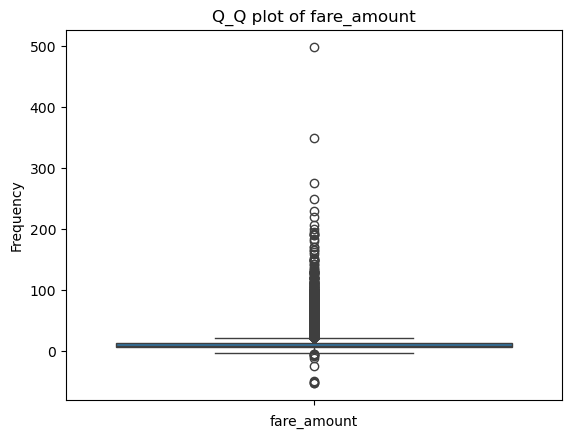

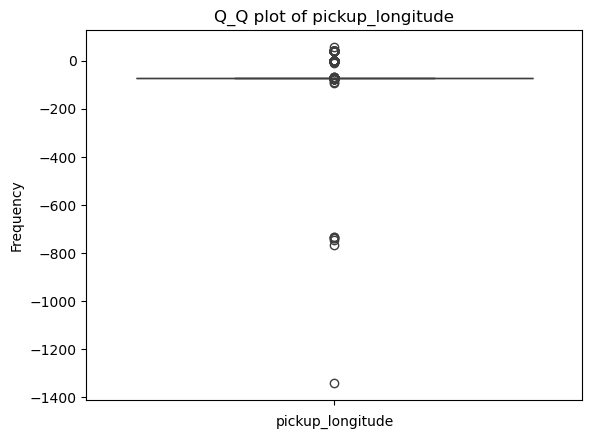

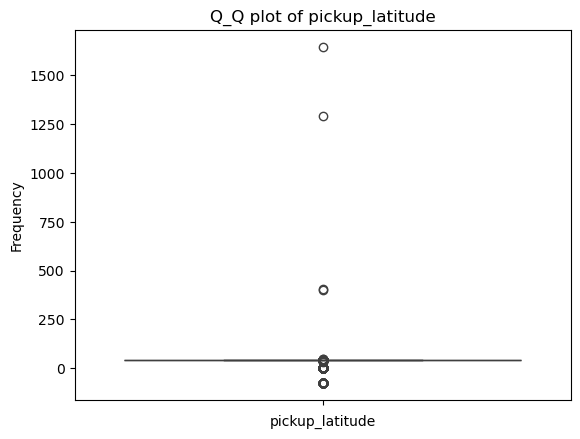

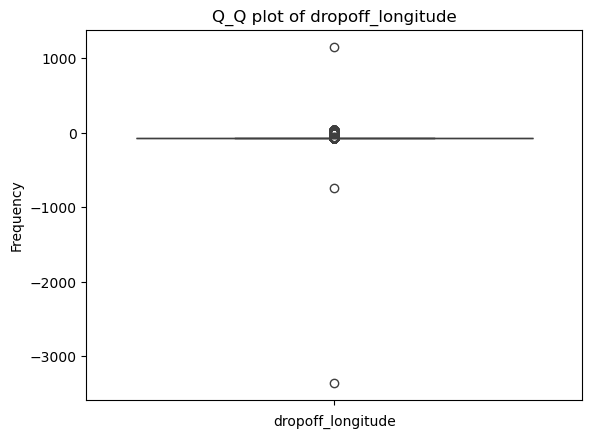

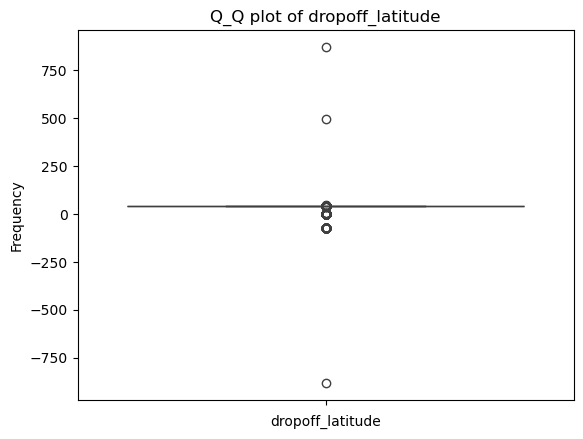

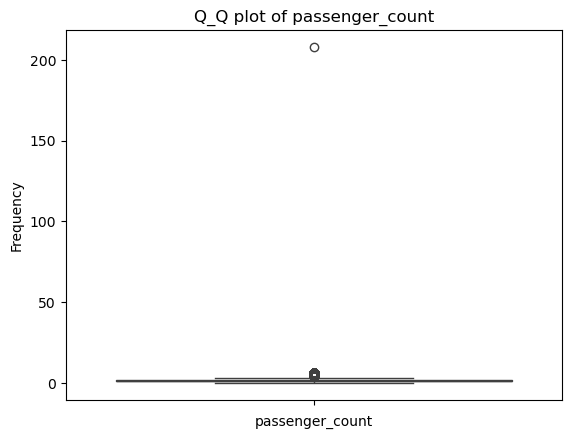

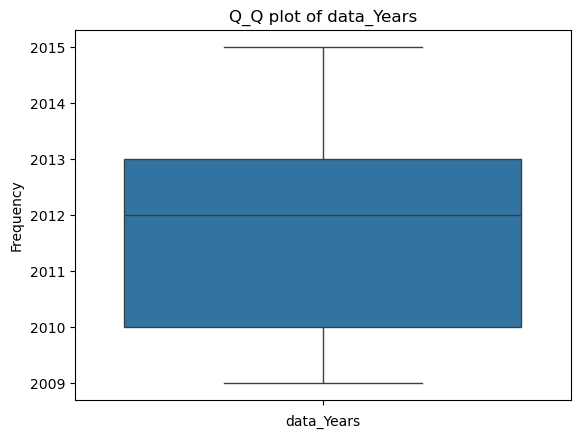

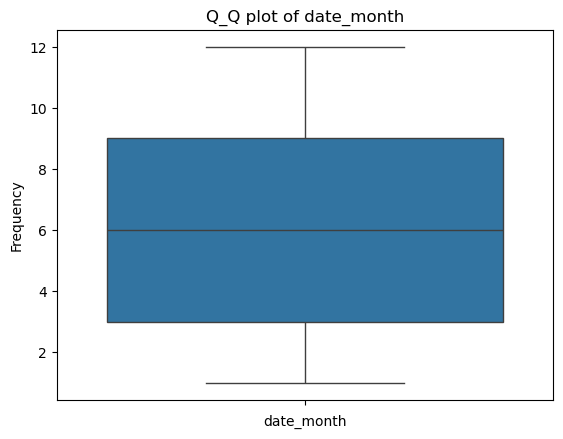

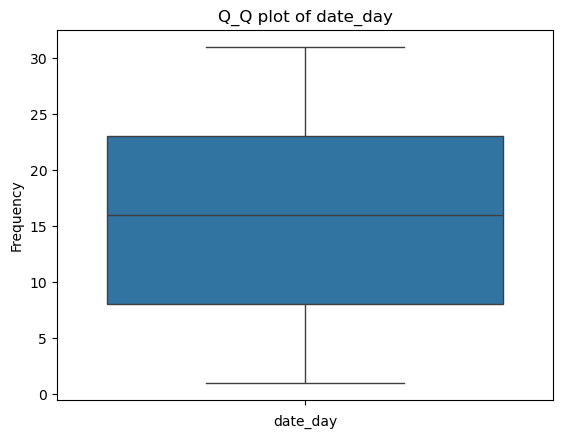

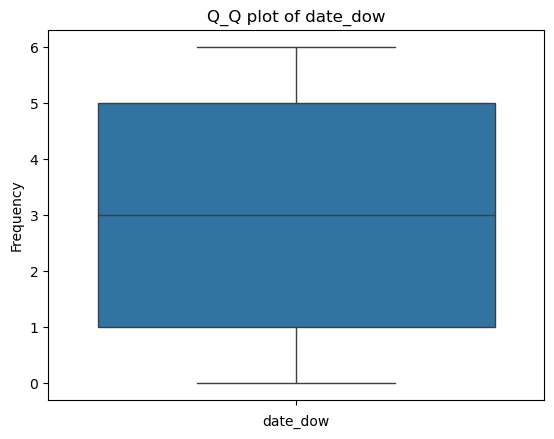

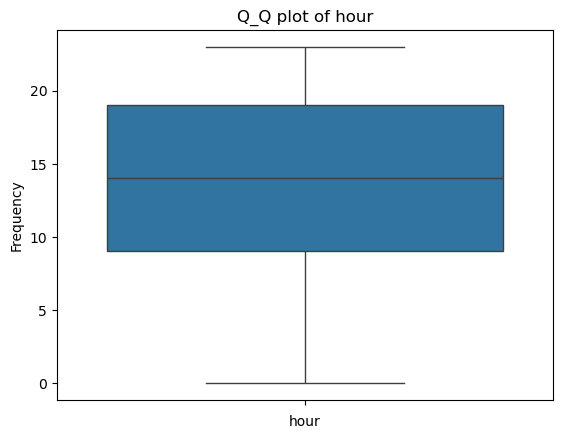

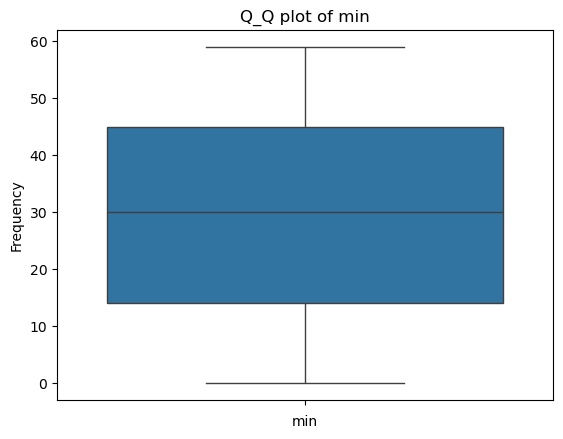

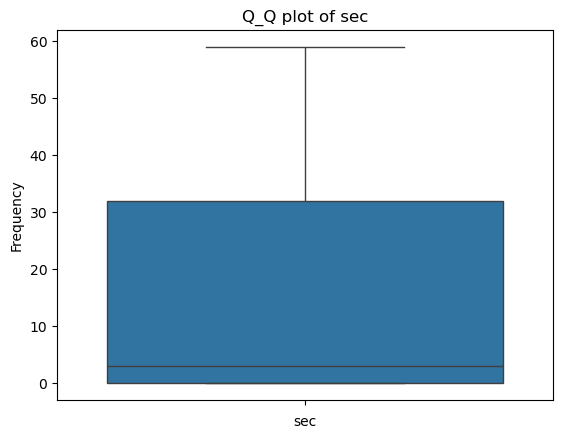

In [43]:
for column in cleaned_dataset.columns:
     # if column ==  'Age':
        
        plt.figure()
        sns.boxplot(UberPrice_datasets[column])  
        plt.xlabel(column) 
        plt.ylabel('Frequency')  
        plt.title(f'Q_Q plot of {column}')
        plt.show() 

In [44]:
cleaned_dataset['fare_amount'].value_counts()

fare_amount
6.50     9218
4.50     7884
8.50     7160
5.70     5585
5.30     5557
         ... 
24.33       1
23.47       1
16.27       1
67.99       1
53.30       1
Name: count, Length: 439, dtype: int64

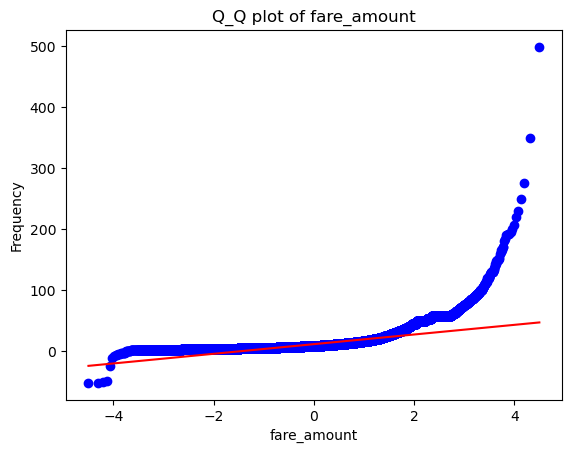

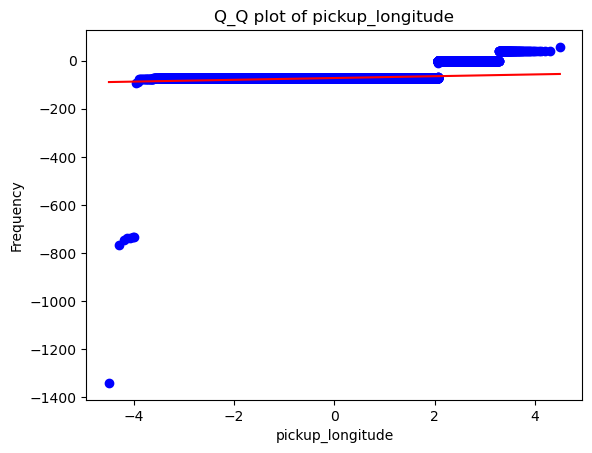

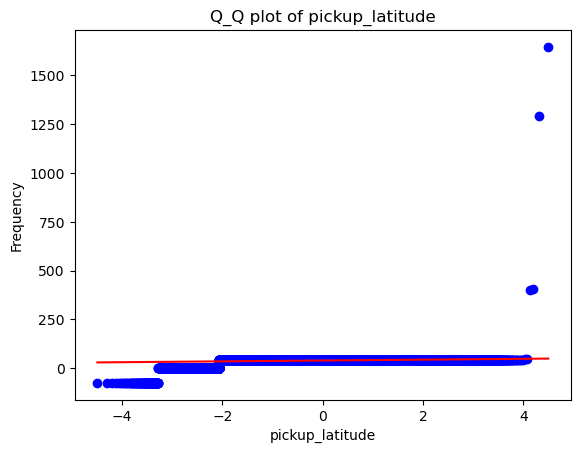

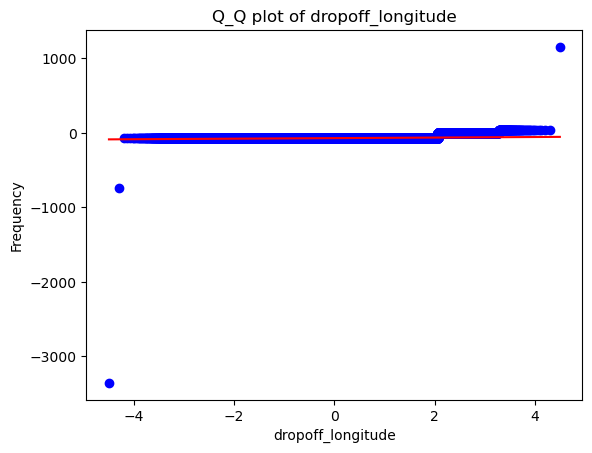

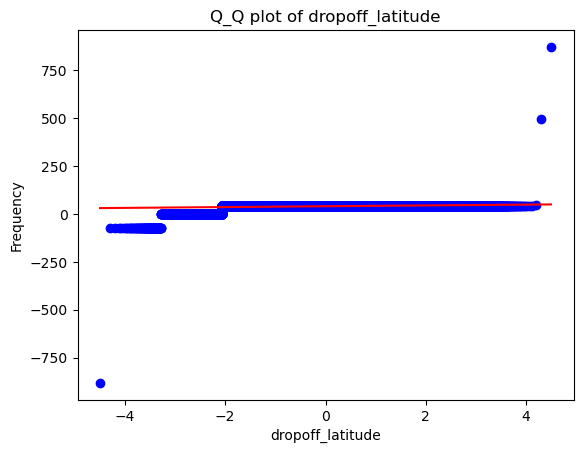

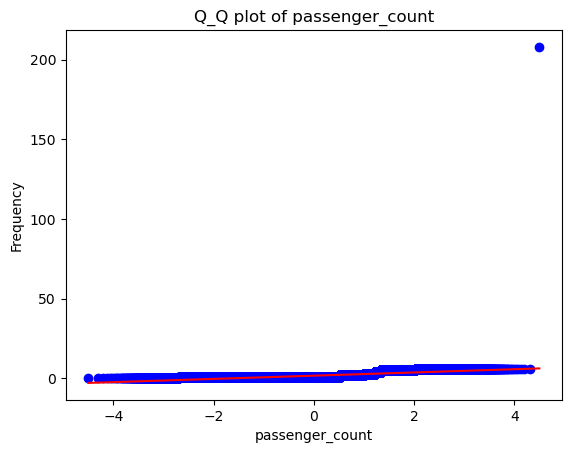

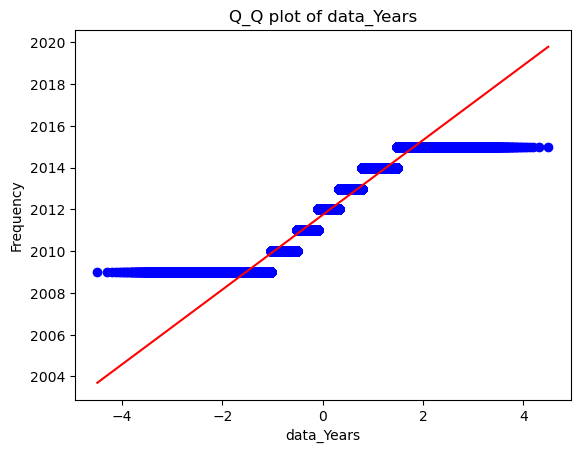

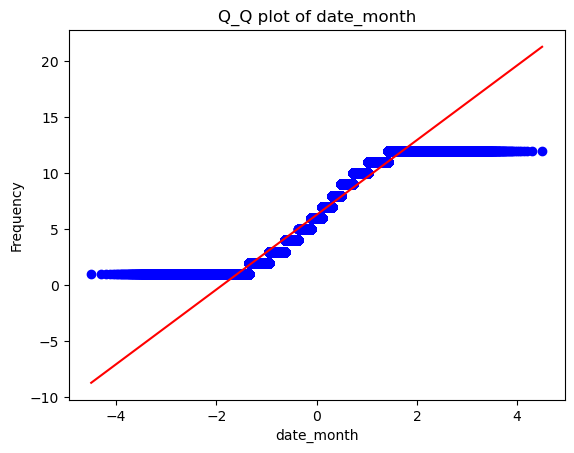

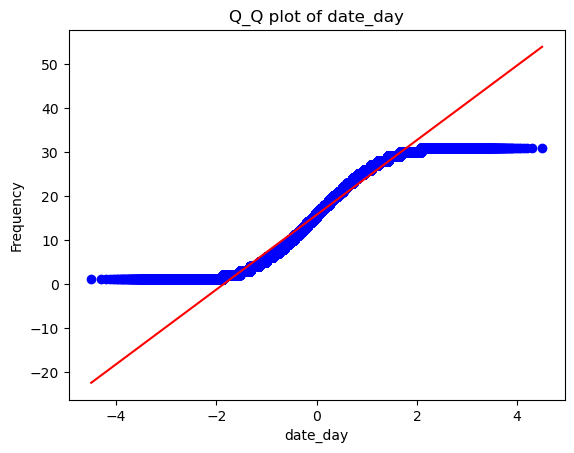

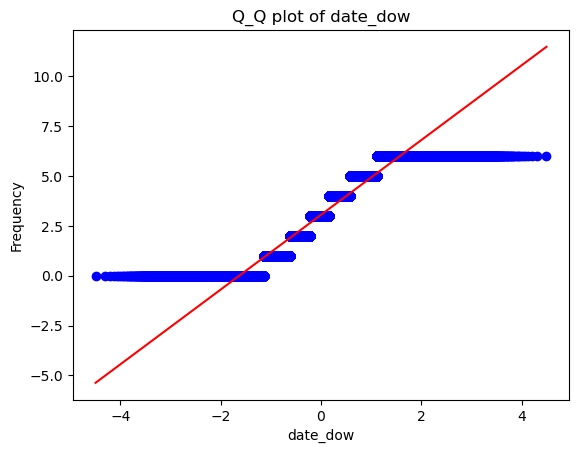

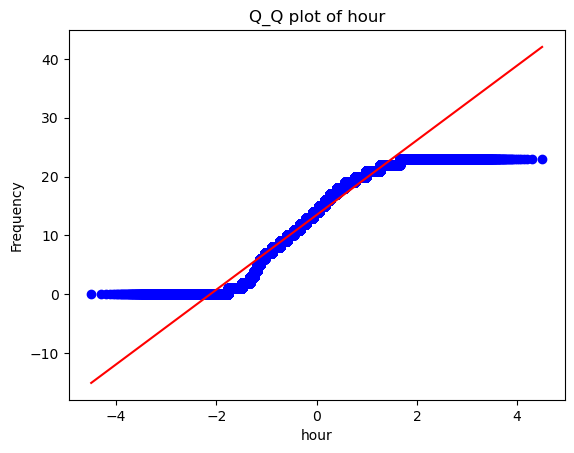

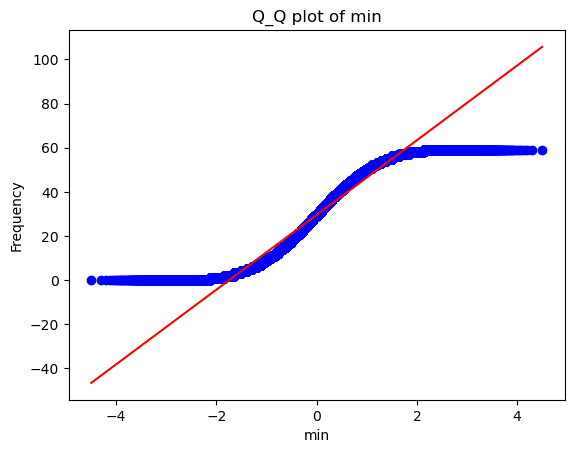

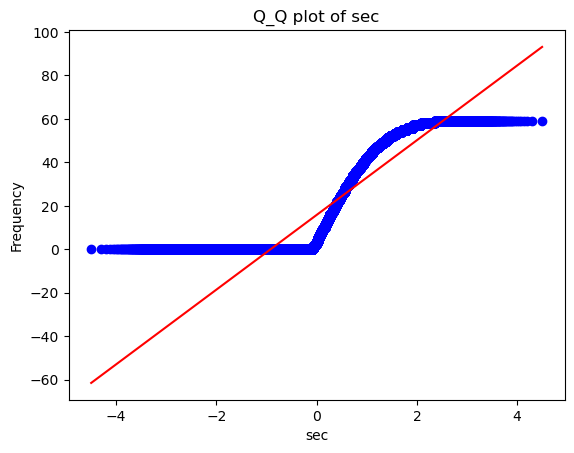

In [45]:
for column in cleaned_dataset.columns:
     # if column ==  'Age':
        
        plt.figure()
        stats.probplot(UberPrice_datasets[column],dist="norm", plot=plt)  
        plt.xlabel(column) 
        plt.ylabel('Frequency')  
        plt.title(f'Q_Q plot of {column}')
        plt.show() 

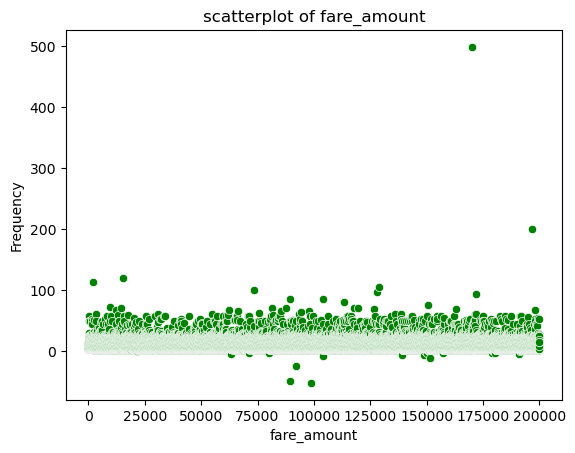

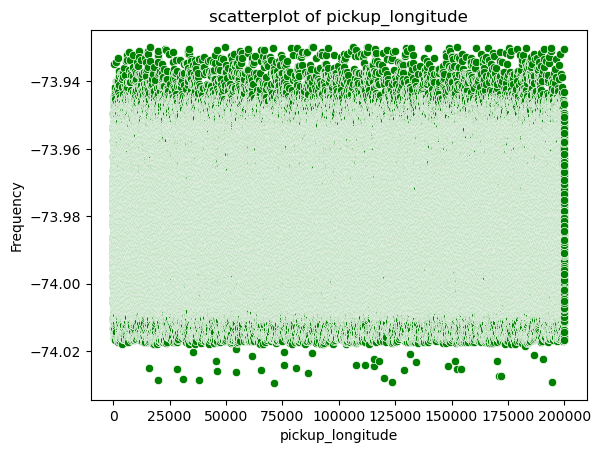

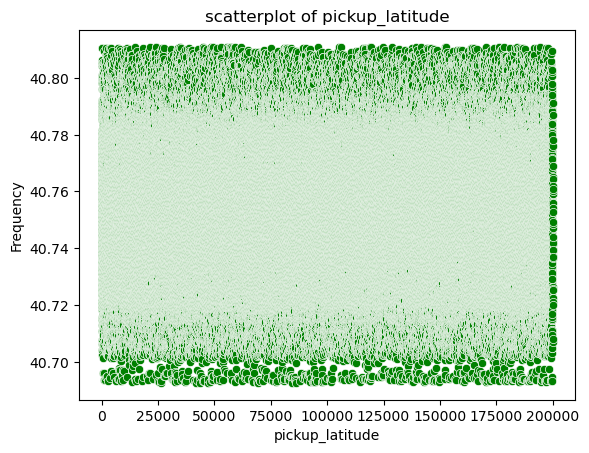

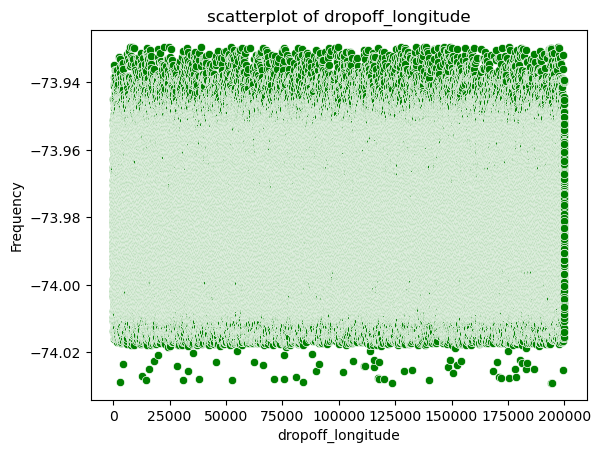

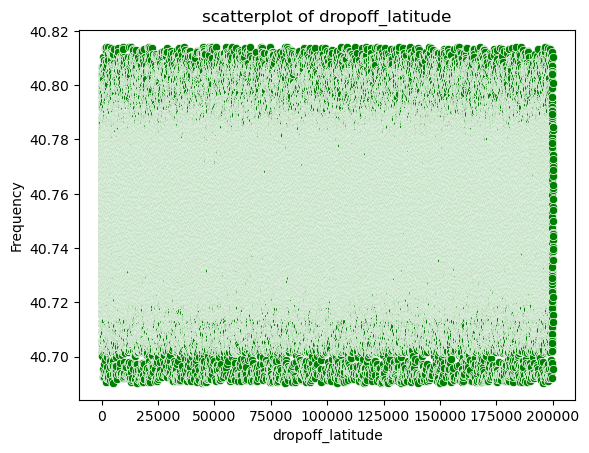

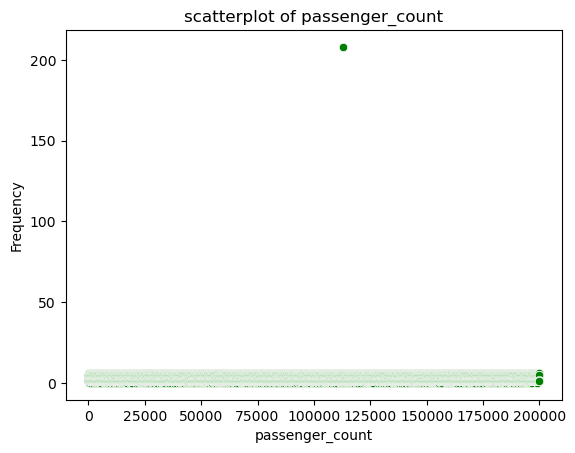

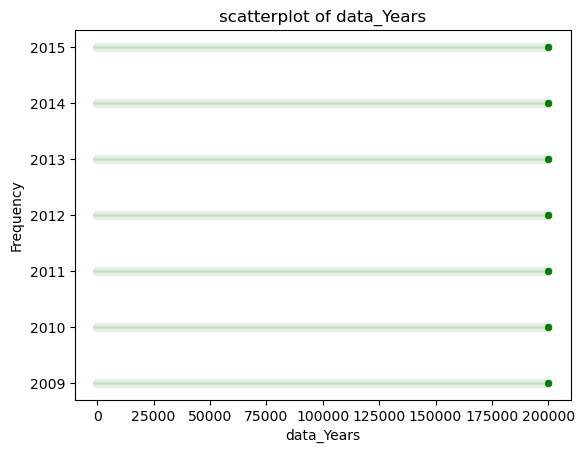

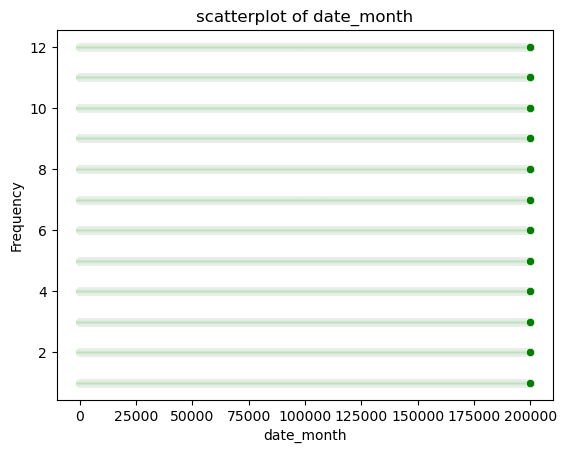

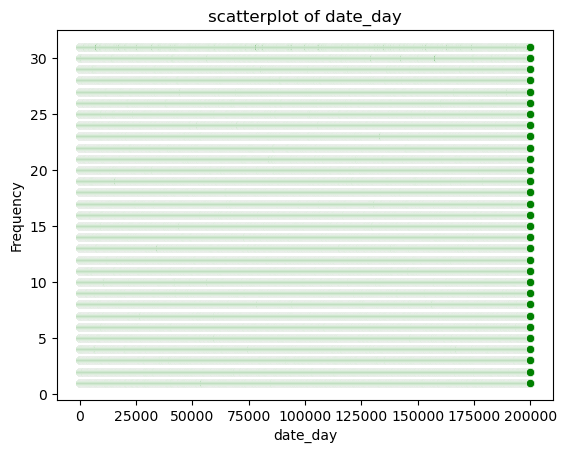

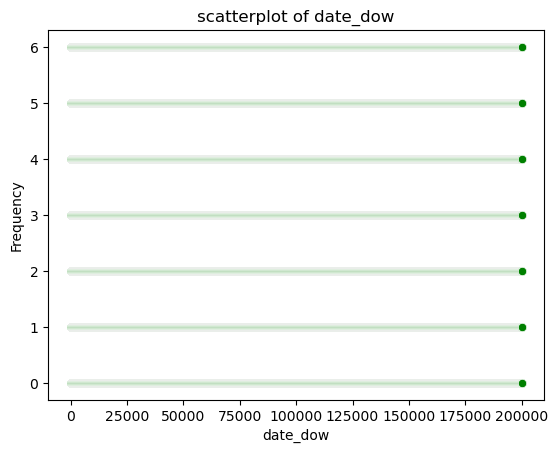

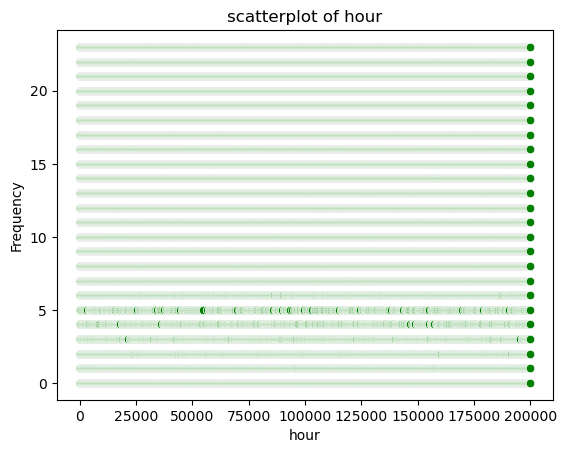

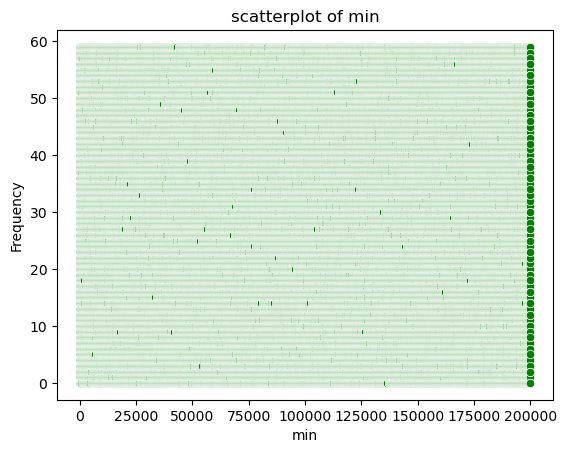

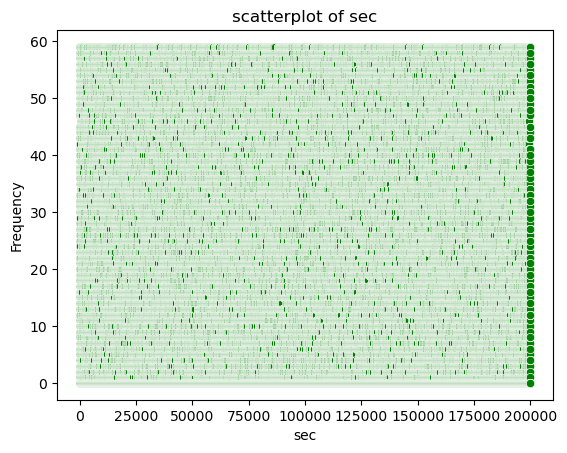

In [46]:
for column in cleaned_dataset.columns:
    sns.scatterplot(cleaned_dataset[column],color = 'g')
    plt.xlabel(column) 
    plt.ylabel('Frequency')  
    plt.title(f'scatterplot of {column}')
    plt.show()
    plt.show()

In [47]:
# # fist we applying the pair polt
# sns.pairplot(UberPrice_datasets,palette='Dark2')
# plt.show()

In [48]:
correlation_matrix = cleaned_dataset.describe().corr()
correlation_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,data_Years,date_month,date_day,date_dow,hour,min,sec
fare_amount,1.000000,0.999995,0.999996,0.999995,0.999996,0.999998,0.999931,0.999996,0.999996,0.999996,0.999996,0.999996,0.999996
pickup_longitude,0.999995,1.000000,1.000000,1.000000,1.000000,0.999999,0.999925,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
pickup_latitude,0.999996,1.000000,1.000000,1.000000,1.000000,0.999999,0.999933,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
dropoff_longitude,0.999995,1.000000,1.000000,1.000000,1.000000,0.999999,0.999925,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
dropoff_latitude,0.999996,1.000000,1.000000,1.000000,1.000000,0.999999,0.999933,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
passenger_count,0.999998,0.999999,0.999999,0.999999,0.999999,1.000000,0.999932,0.999999,0.999999,0.999999,0.999999,0.999999,1.000000
data_Years,0.999931,0.999925,0.999933,0.999925,0.999933,0.999932,1.000000,0.999931,0.999931,0.999931,0.999931,0.999931,0.999930
date_month,0.999996,1.000000,1.000000,1.000000,1.000000,0.999999,0.999931,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
date_day,0.999996,1.000000,1.000000,1.000000,1.000000,0.999999,0.999931,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
date_dow,0.999996,1.000000,1.000000,1.000000,1.000000,0.999999,0.999931,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


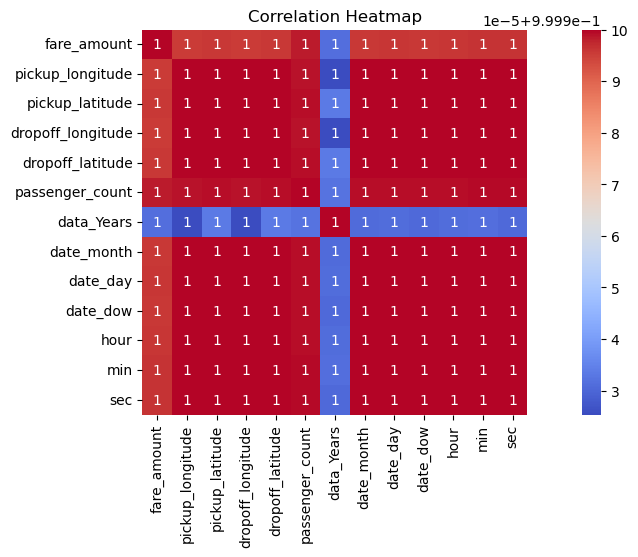

In [49]:
plt.figure(figsize=(14, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15296\2656763885.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=2,errwidth=1.5,width=0.3)


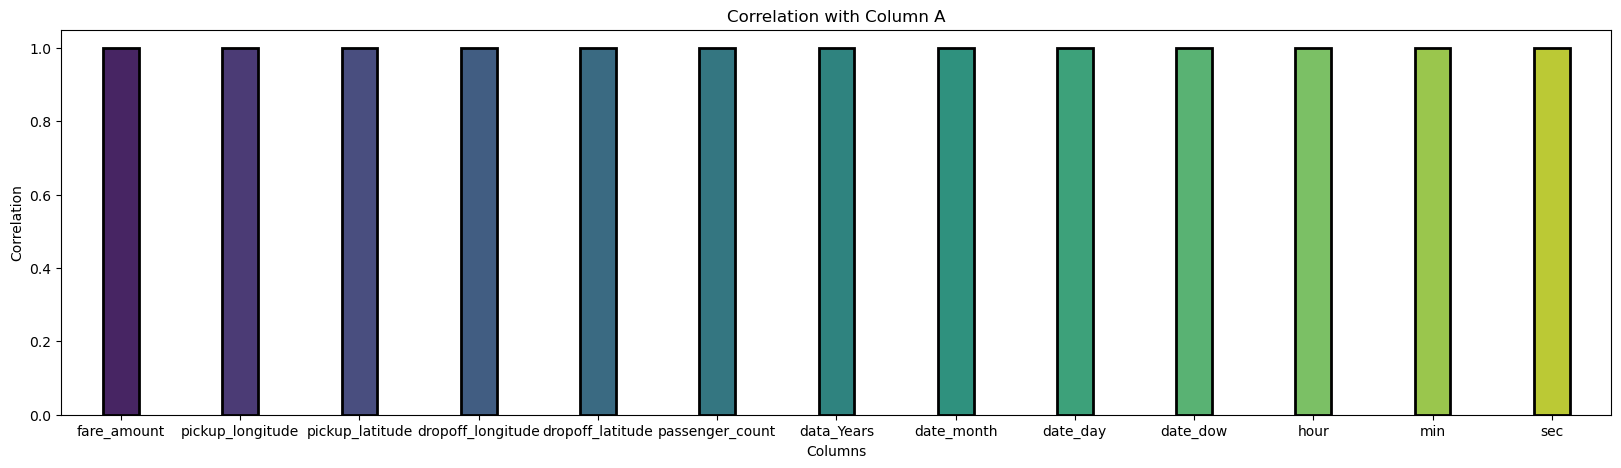

In [50]:
plt.figure(figsize=(20, 5))
# sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
sns.barplot(correlation_matrix, palette='viridis',edgecolor='black', linewidth=2,errwidth=1.5,width=0.3)
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')    # here one have postive co - relation 
plt.show()

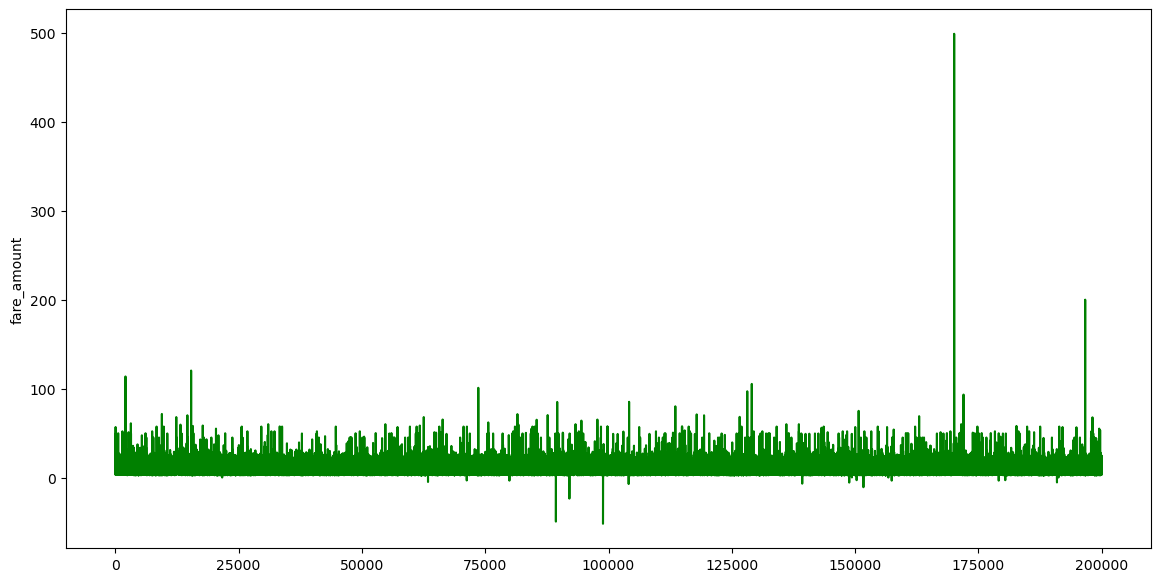

In [51]:
plt.figure(figsize = (14,7))
sns.lineplot(cleaned_dataset.fare_amount,color= "g")
plt.show()

In [52]:
cleaned_dataset.head(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,data_Years,date_month,date_day,date_dow,hour,min,sec
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52,6
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,4,20,4,56


In [53]:
x = cleaned_dataset.drop('fare_amount',axis = 1)
y = cleaned_dataset['fare_amount']

In [54]:
x.head(1)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,data_Years,date_month,date_day,date_dow,hour,min,sec
0,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,3,19,52,6


In [55]:
y

0          7.5
1          7.7
2         12.9
3          5.3
5          4.9
          ... 
199994    12.0
199995     3.0
199996     7.5
199998    14.5
199999    14.1
Name: fare_amount, Length: 170471, dtype: float64

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [57]:
x_train.shape

(136376, 12)

In [58]:
x_test.shape

(34095, 12)

In [59]:
y_train

184888     6.5
17258      8.9
189848    10.5
184277     9.5
109773     4.5
          ... 
140705     9.5
121754     6.1
154847     4.5
172359    10.5
143161     5.0
Name: fare_amount, Length: 136376, dtype: float64

In [60]:
y_test

110481    15.0
62621      4.0
196836     6.5
83772     14.5
128223     5.7
          ... 
22960      6.5
31384     11.0
32925      6.9
10998     10.9
131971     8.5
Name: fare_amount, Length: 34095, dtype: float64

In [61]:
# Define the preprocessing steps for numerical and categorical columns
numerical_features = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

In [62]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [63]:
# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
           ])

In [64]:
numerical_transformer

Pipeline(steps=[('scaler', StandardScaler())])

In [65]:
# Create the final pipeline including the preprocessor and a classifier
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('linear regression', LinearRegression())
])

In [66]:
from sklearn import set_config
# Plot the pipeline
set_config(display='diagram')
display(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear regression', LinearRegression())])

In [67]:
pipeline.fit(x_train, y_train)

# Make predictions
y_pred = pipeline.predict(x_test)

In [68]:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 22.78351581188955
Mean Absolute Error: 3.3301517064397275
R² Score: 0.0403346801566673


In [69]:
print('Uber Fare Prediction is',y_pred)

Uber Fare Prediction is [8.94730567 9.56862378 8.51403883 ... 8.42378474 8.68858755 9.75297085]


In [70]:
# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold object with the specified number of folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and obtain the scores
scores = cross_val_score(pipeline,x, y, scoring='neg_mean_squared_error', cv=kf)

# Convert the negative MSE scores to positive and calculate mean and standard deviation
mse_scores = -scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

# Print the mean and standard deviation of MSE scores
print(f'Mean MSE: {mean_mse}')
print(f'Std MSE: {std_mse}')


Mean MSE: 23.512626442692167
Std MSE: 2.363421988046474
